In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train = pd.read_csv('raw_data/bb_train.csv')
df_dimension = pd.read_csv('raw_data/park_dimensions.csv')

In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46244 entries, 0 to 46243
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bip_id            46244 non-null  int64  
 1   game_date         46244 non-null  object 
 2   home_team         46244 non-null  object 
 3   away_team         46244 non-null  object 
 4   batter_team       46244 non-null  object 
 5   batter_name       46244 non-null  object 
 6   pitcher_name      46244 non-null  object 
 7   batter_id         46244 non-null  int64  
 8   pitcher_id        46244 non-null  int64  
 9   is_batter_lefty   46244 non-null  int64  
 10  is_pitcher_lefty  46244 non-null  int64  
 11  bb_type           46238 non-null  object 
 12  bearing           46244 non-null  object 
 13  pitch_name        46244 non-null  object 
 14  park              46244 non-null  int64  
 15  inning            46244 non-null  int64  
 16  outs_when_up      46244 non-null  int64 

In [3]:
df_train.isna().sum()

bip_id                  0
game_date               0
home_team               0
away_team               0
batter_team             0
batter_name             0
pitcher_name            0
batter_id               0
pitcher_id              0
is_batter_lefty         0
is_pitcher_lefty        0
bb_type                 6
bearing                 0
pitch_name              0
park                    0
inning                  0
outs_when_up            0
balls                   0
strikes                 0
plate_x                 0
plate_z                 0
pitch_mph               0
launch_speed        11805
launch_angle        11785
is_home_run             0
dtype: int64

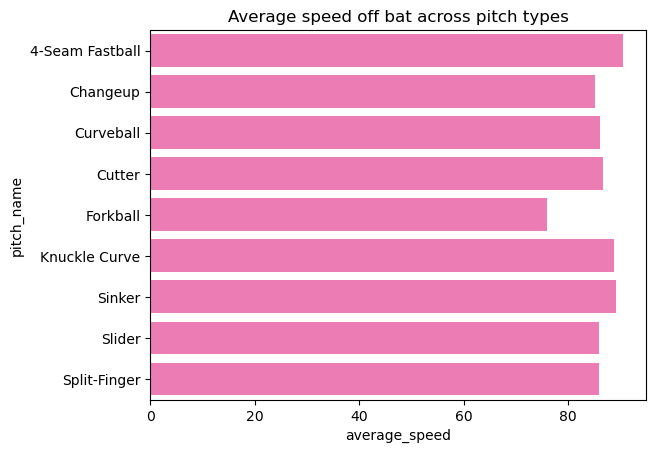

In [5]:
plot_df = df_train.groupby('pitch_name').launch_speed.mean().to_frame('average_speed').reset_index()
sns.barplot(y = plot_df.pitch_name,x = plot_df.average_speed,color = 'hotpink')
plt.title("Average speed off bat across pitch types");

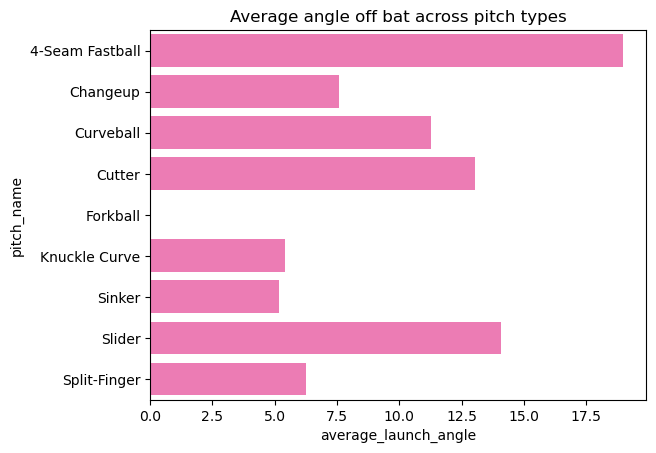

In [6]:
plot_df = df_train.groupby('pitch_name').launch_angle.mean().to_frame('average_launch_angle').reset_index()
sns.barplot(y = plot_df.pitch_name,x = plot_df.average_launch_angle,color = 'hotpink')
plt.title("Average angle off bat across pitch types");

In [31]:
df_train.nunique().to_frame('unique_values').rename_axis('feature').sort_values('unique_values')

,unique_values
feature,
is_home_run,2
is_pitcher_lefty,2
is_batter_lefty,2
strikes,3
outs_when_up,3
bearing,3
bb_type,4
balls,4
pitch_name,9


Park Dimensions

In [32]:
df_dimension

,park,NAME,Cover,LF_Dim,CF_Dim,RF_Dim,LF_W,CF_W,RF_W
0,0,Chase Field,Roof,328,407,335,8,25,8
1,1,SunTrust Park,Outdoor,335,400,325,6,8,16
2,2,Oriole Park at Camden Yards,Outdoor,333,400,318,7,7,21
3,3,Fenway Park,Outdoor,310,390,302,37,9,3
4,4,Wrigley Field,Outdoor,355,400,353,16,11,16
5,5,Great American Ballpark,Outdoor,328,404,325,12,8,8
6,6,Progressive Field,Outdoor,325,405,325,19,9,14
7,7,Coors Field,Outdoor,347,415,350,13,8,16
8,8,Guarantee Rate Park,Outdoor,330,400,335,8,8,8
9,9,Comerica Park,Outdoor,345,420,330,6,8,8


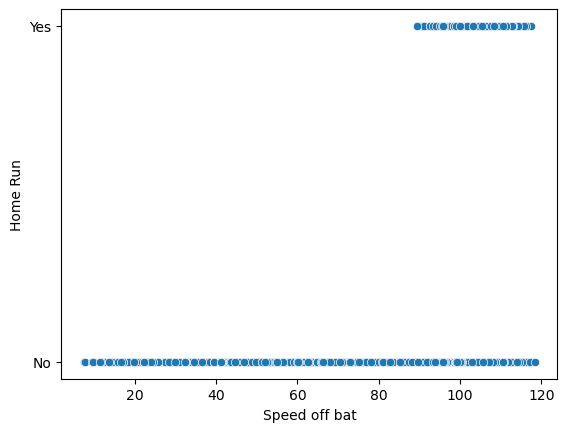

In [16]:
sns.scatterplot(
    x = df_train.launch_speed.to_numpy(),
    y = df_train.is_home_run.to_numpy()
)
plt.xlabel("Speed off bat")
plt.ylabel("Home Run")
plt.yticks([0,1],labels=['No','Yes'])
plt.show();

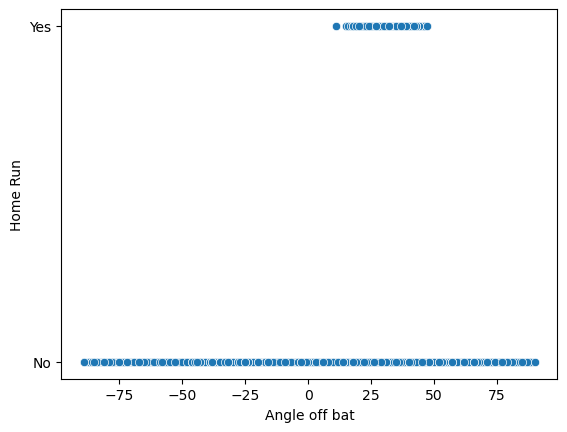

In [18]:
sns.scatterplot(
    x = df_train.launch_angle.to_numpy(),
    y = df_train.is_home_run.to_numpy()
)
plt.xlabel("Angle off bat")
plt.ylabel("Home Run")
plt.yticks([0,1],labels=['No','Yes'])
plt.show();

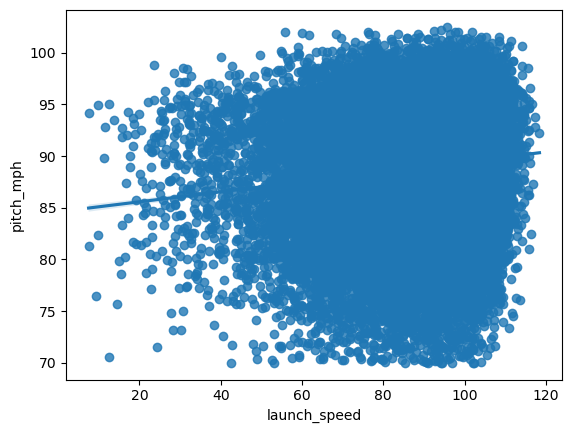

In [20]:
sns.regplot(x = df_train.launch_speed,
            y = df_train.pitch_mph);